#Customer Acquisition Analytics



In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv("bank_marketing.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [2]:
# adding the `prospectid` column to identify every prospect seperately
loan['prospectid'] = loan.index
loan.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,prospectid
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,6
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,8
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,9


In [3]:
# mapping yes and no in the output column with 1 and 0 respectively
loan['response'] = loan['response'].map({'yes': 1, 'no': 0})
loan['response'].value_counts()

0    36548
1     4640
Name: response, dtype: int64

In [4]:
# keeping a copy of the original dataset
loan_copy = loan 

## EDA & data preparation

In [5]:
# removing the excessive outliers from the dataset 
loan['age'][loan['age']>71] =71

In [6]:
# replacing unknown value for `marital status` with the biggest group(married)
loan.replace({'marital' : { 'unknown' : 'married'}}, inplace=True)

In [7]:
# converting the `education` to be in 5categories instead of 8
loan.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

In [8]:
# removing the outliers by replacing with the 99th percentile
loan['duration'][loan['duration']>1271] =1271
loan['campaign'][loan['campaign']>14] =14

In [9]:
# converting the `pdays` into a categorical column
loan['pdays'][loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

loan['pdays'][loan['pdays'].isin([999])]='First_time_contacted'

loan['pdays'][~loan['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'

In [10]:
# converting the `previous` into a categorical column
loan['previous'][loan['previous'].isin([0])]='Never contacted'
loan['previous'][loan['previous'].isin([1,2,3])]='Less_than_3_times'
loan['previous'][loan['previous'].isin([4,5,6,7])]='More than_3_times'

In [11]:
# Creating a dummy variable for the variable 'job' and dropping the first one.
job = pd.get_dummies(loan['job'],prefix='job',drop_first=True)

#Adding the results to the master dataframe
loan = pd.concat([loan,job],axis=1)

In [12]:
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


In [13]:
# Creating dummy variable for marital column
marital = pd.get_dummies(loan['marital'],prefix='marital',drop_first=True)
loan = pd.concat([loan,marital],axis=1)

In [14]:
# Creating dummy variable for education column
education = pd.get_dummies(loan['education'],prefix='education',drop_first=True)
loan = pd.concat([loan,education],axis=1)

In [15]:
# Creating dummy variable for default column
default = pd.get_dummies(loan['default'],prefix='default',drop_first=True)
loan = pd.concat([loan,default],axis=1)

In [16]:
# Creating dummy variable for housing column
housing = pd.get_dummies(loan['housing'],prefix='housing',drop_first=True)
loan = pd.concat([loan,housing],axis=1)

In [17]:
# Creating dummy variable for loan column
loan_v= pd.get_dummies(loan['loan'],prefix='loan',drop_first=True)
loan = pd.concat([loan,loan_v],axis=1)

In [18]:
# Creating dummy variable for contact column
contact = pd.get_dummies(loan['contact'],prefix='contact',drop_first=True)
loan = pd.concat([loan,contact],axis=1)

In [19]:
# Creating dummy variable for month column
month = pd.get_dummies(loan['month'],prefix='month',drop_first=True)
loan = pd.concat([loan,month],axis=1)

In [20]:
# Creating dummy variable for day_of_week column
day_of_week = pd.get_dummies(loan['day_of_week'],prefix='day_of_week',drop_first=True)
loan = pd.concat([loan,day_of_week],axis=1)

In [21]:
# Creating dummy variable for pdays column
pdays = pd.get_dummies(loan['pdays'],prefix='pdays',drop_first=True)
loan = pd.concat([loan,pdays],axis=1)

In [22]:
# Creating dummy variable for previous column
previous = pd.get_dummies(loan['previous'],prefix='previous',drop_first=True)
loan = pd.concat([loan,previous],axis=1)

In [23]:
# Creating dummy variable for poutcome column
poutcome = pd.get_dummies(loan['poutcome'],prefix='poutcome',drop_first=True)
loan = pd.concat([loan,poutcome],axis=1)

In [24]:
# Drop all features for whom dummy variable has been created
loan.drop(columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'], inplace=True)

In [25]:
loan.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,prospectid,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,1,...,1,0,0,0,0,1,0,1,1,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,2,...,1,0,0,0,0,1,0,1,1,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,3,...,1,0,0,0,0,1,0,1,1,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,4,...,1,0,0,0,0,1,0,1,1,0


In [26]:
# keeping a copy of the clean dataset
loan_clean = loan

## Test-Train split

In [27]:
# Import library to split the dataset into test and train
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = loan.drop(['response'],axis=1)

# Putting response variable to y
y = loan['response']

In [28]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [35]:
# saving the prospectid and duration columns from the dataset
X_train_dur = X_train.loc[:,['prospectid', 'duration']]
X_test_dur = X_test.loc[:,['prospectid', 'duration']]
print(X_train_dur.head())
print(X_test_dur.head())

       prospectid  duration
7019         7019       102
27175       27175       218
15817       15817       333
40971       40971       130
8467         8467       267
       prospectid  duration
33148       33148        52
27585       27585       407
15722       15722       177
40349       40349       187
2576         2576       165


In [36]:
# removing the two columns from the X_train and X_test dataframes
X_train.drop(columns = ['duration', 'prospectid'], inplace=True)
X_test.drop(columns = ['duration', 'prospectid'], inplace=True)

In [40]:
X_test.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
33148,28,1,-1.8,92.893,-46.2,1.291,5099.1,0,0,0,...,0,0,1,0,0,1,0,1,1,0
27585,41,4,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,...,0,0,0,0,0,1,0,1,1,0
15722,34,1,1.4,93.918,-42.7,4.960,5228.1,1,0,0,...,1,0,0,0,0,1,0,1,1,0
40349,28,2,-1.7,94.027,-38.3,0.899,4991.6,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2576,55,2,1.1,93.994,-36.4,4.856,5191.0,0,0,0,...,0,0,1,0,0,1,0,1,1,0


## Standardisation

In [41]:
X_train.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
7019,31,4,1.1,93.994,-36.4,4.860,5191.0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
27175,51,3,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,...,0,0,0,0,0,1,0,1,1,0
15817,39,3,1.4,93.918,-42.7,4.960,5228.1,0,0,0,...,1,0,0,0,0,1,0,1,1,0
40971,68,4,-1.1,94.601,-49.5,1.000,4963.6,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8467,37,3,1.4,94.465,-41.8,4.864,5228.1,0,0,0,...,0,0,1,0,0,1,0,1,1,0


In [42]:
# Standardising continuous features for X_train
X_train_df = X_train[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

In [43]:
# dropping the original columns
X_train = X_train.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

# adding standardised columns
X_train = pd.concat([X_train,std_X_train_df],axis=1)

In [44]:
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7019,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.877019,0.646930,0.649758,0.723298,0.891826,0.715448,0.333618
27175,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1.084499,0.213946,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15817,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.092412,0.213946,0.840847,0.591769,-0.471164,0.773077,0.847088
40971,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2.751789,0.646930,-0.751563,1.773794,-1.942327,-1.509050,-2.813633
8467,0,0,0,0,0,0,0,0,1,0,...,1,1,0,-0.288564,0.213946,0.840847,1.538427,-0.276451,0.717753,0.847088


In [45]:
# Standardising continuous features for X_test
X_test_df = X_test[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

std_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()

In [46]:
# dropping the original columns
X_test = X_test.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

# adding standardised columns
X_test = pd.concat([X_test,std_X_test_df],axis=1)

In [47]:
X_test.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33148,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-1.182984,-0.651460,-1.199007,-1.172918,-1.237193,-1.348603,-0.944859
27585,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0.100062,0.663413,-0.118526,-0.644728,-0.332420,0.226981,0.393573
15722,1,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.590809,-0.651460,0.834840,0.590583,-0.483215,0.768913,0.840640
40349,0,0,0,0,0,0,0,0,0,0,...,0,0,1,-1.182984,-0.213169,-1.135450,0.778116,0.464642,-1.574841,-2.432774
2576,0,0,0,0,0,0,1,0,0,0,...,1,1,0,1.481803,-0.213169,0.644167,0.721340,0.873944,0.708890,0.327136


Now that we have completed the data preperation, we can safely move ahead with the Modelling excercise. 

## Modelling

### Linear Regression

In [48]:
# Importing LogisticRegression and metrics from the sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

In [49]:
# Fitting the model
logitreg = LogisticRegression()
logitreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
# Logistic regression model
logitm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logitm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28782
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7933.3
Date:                Sun, 10 Nov 2019   Deviance:                       15867.
Time:                        16:31:05   Pearson chi2:                 2.92e+04
No. Iterations:                    19   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.6435      0.284     -5.777      0.000      -2.201      -1.086
job_blue-collar                    -0.1547      0.083     -1.873      0.061      -0.317       0.007
job_entrepreneur                   -0.2347      0.132     -1.776      0.076      -0.494       0.024
job_housemaid                       0.0296      0.148      0.201      0.841      -0.260       0.319
job_management                     -0.1551      0.092     -1.690      0.091      -0.335       0.025
job_retired                         0.2281      0.110      2.071      0.038       0.012       0.444
job_self-employed                  -0.0586      0.121     -0.483      0.629      -0.297       0.179
job_services                       -0.0573      0.088     -0.649      0.516      -0.230       0.116
job_student                         0.2777      0.120      2.324      0.020       0.043       0.512
job_technician                     -0.0158      0.075     -0.211      0.833      -0.162       0.131
job_unemployed                     -0.0249      0.134     -0.186      0.853      -0.288       0.238
job_unknown                        -0.0977      0.241     -0.406      0.685      -0.569       0.374
marital_married                     0.0546      0.072      0.761      0.446      -0.086       0.195
marital_single                      0.1182      0.082      1.444      0.149      -0.042       0.279
education_Secondary_Education       0.0322      0.072      0.447      0.655      -0.109       0.174
education_Tertiary_Education        0.1214      0.073      1.663      0.096      -0.022       0.265
education_professional.course       0.0775      0.086      0.902      0.367      -0.091       0.246
education_unknown                   0.1810      0.109      1.663      0.096      -0.032       0.394
default_unknown                    -0.2785      0.070     -4.003      0.000      -0.415      -0.142
default_yes                       -17.5533   1.25e+04     -0.001      0.999   -2.45e+04    2.45e+04
housing_unknown                    -0.0493      0.071     -0.693      0.489      -0.189       0.090
housing_yes                        -0.0349      0.043     -0.809      0.419      -0.120       0.050
loan_unknown                       -0.0493      0.071     -0.693      0.489      -0.189       0.090
loan_yes                            0.0121      0.059      0.203      0.839      -0.104       0.128
contact_telephone                  -0.6338      0.079     -8.055      0.000      -0.788      -0.480
month_aug                           0.4285      0.128      3.346      0.001       0.178       0.679
month_dec                           0.2895      0.226      1.282      0.200      -0.153       0.732
month_jul                          -0.0148      0.100     -0.148      0.882      -0.211       0.181
month_jun                          -0.6888      0.132     -5.2

In [56]:
# removing variable with very high P value

X_train = X_train.drop(['default_yes', 'month_jul', 'pdays_Contacted_in_first_10days'], 1)

In [57]:
# Logistic regression model
logitm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logitm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28785
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7933.4
Date:                Sun, 10 Nov 2019   Deviance:                       15867.
Time:                        16:59:13   Pearson chi2:                 2.92e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.6330      0.245     -6.666      0.000      -2.113      -1.153
job_blue-collar                  -0.1547      0.083     -1.872      0.061      -0.317       0.007
job_entrepreneur                 -0.2348      0.132     -1.777      0.076      -0.494       0.024
job_housemaid                     0.0297      0.148      0.201      0.840      -0.260       0.319
job_management                   -0.1550      0.092     -1.690      0.091      -0.335       0.025
job_retired                       0.2277      0.110      2.068      0.039       0.012       0.443
job_self-employed                -0.0585      0.121     -0.482      0.630      -0.297       0.180
job_services                     -0.0570      0.088     -0.646      0.518      -0.230       0.116
job_student                       0.2777      0.120      2.324      0.020       0.043       0.512
job_technician                   -0.0159      0.075     -0.213      0.832      -0.163       0.131
job_unemployed                   -0.0254      0.134     -0.189      0.850      -0.288       0.238
job_unknown                      -0.0977      0.241     -0.406      0.685      -0.569       0.374
marital_married                   0.0546      0.072      0.763      0.446      -0.086       0.195
marital_single                    0.1180      0.082      1.442      0.149      -0.042       0.278
education_Secondary_Education     0.0321      0.072      0.446      0.656      -0.109       0.173
education_Tertiary_Education      0.1218      0.073      1.669      0.095      -0.021       0.265
education_professional.course     0.0776      0.086      0.904      0.366      -0.091       0.246
education_unknown                 0.1811      0.109      1.664      0.096      -0.032       0.394
default_unknown                  -0.2782      0.070     -3.999      0.000      -0.415      -0.142
housing_unknown                  -0.0490      0.071     -0.690      0.490      -0.188       0.090
housing_yes                      -0.0349      0.043     -0.808      0.419      -0.120       0.050
loan_unknown                     -0.0490      0.071     -0.690      0.490      -0.188       0.090
loan_yes                          0.0120      0.059      0.203      0.839      -0.104       0.128
contact_telephone                -0.6301      0.075     -8.433      0.000      -0.777      -0.484
month_aug                         0.4372      0.112      3.894      0.000       0.217       0.657
month_dec                         0.2979      0.220      1.356      0.175      -0.133       0.728
month_jun                        -0.6806      0.119     -5.736      0.000      -0.913      -0.448
month_mar                         1.4681      0.150      9.800      0.000       1.174       1.762
month_may                        -0.4199      0.074     -5.664      0.000      -0.565      -0.275
month_nov                 

In [58]:
# removing variable with very high P value

X_train = X_train.drop(['job_housemaid', 'job_unemployed', 'month_oct'], 1)

In [59]:
# Logistic regression model
logitm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logitm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28788
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7933.5
Date:                Sun, 10 Nov 2019   Deviance:                       15867.
Time:                        17:08:22   Pearson chi2:                 2.92e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.6348      0.241     -6.786      0.000      -2.107      -1.163
job_blue-collar                  -0.1557      0.078     -1.998      0.046      -0.308      -0.003
job_entrepreneur                 -0.2352      0.131     -1.801      0.072      -0.491       0.021
job_management                   -0.1552      0.090     -1.718      0.086      -0.332       0.022
job_retired                       0.2256      0.106      2.123      0.034       0.017       0.434
job_self-employed                -0.0585      0.120     -0.487      0.626      -0.294       0.177
job_services                     -0.0570      0.086     -0.662      0.508      -0.226       0.112
job_student                       0.2784      0.118      2.354      0.019       0.047       0.510
job_technician                   -0.0159      0.072     -0.219      0.826      -0.158       0.126
job_unknown                      -0.0981      0.240     -0.410      0.682      -0.568       0.371
marital_married                   0.0544      0.072      0.760      0.447      -0.086       0.195
marital_single                    0.1180      0.082      1.441      0.149      -0.042       0.278
education_Secondary_Education     0.0309      0.071      0.436      0.663      -0.108       0.170
education_Tertiary_Education      0.1207      0.071      1.708      0.088      -0.018       0.259
education_professional.course     0.0764      0.085      0.894      0.371      -0.091       0.244
education_unknown                 0.1806      0.108      1.666      0.096      -0.032       0.393
default_unknown                  -0.2781      0.070     -4.000      0.000      -0.414      -0.142
housing_unknown                  -0.0490      0.071     -0.689      0.491      -0.188       0.090
housing_yes                      -0.0350      0.043     -0.811      0.417      -0.120       0.050
loan_unknown                     -0.0490      0.071     -0.689      0.491      -0.188       0.090
loan_yes                          0.0121      0.059      0.204      0.838      -0.104       0.128
contact_telephone                -0.6313      0.074     -8.540      0.000      -0.776      -0.486
month_aug                         0.4421      0.102      4.325      0.000       0.242       0.643
month_dec                         0.3049      0.207      1.475      0.140      -0.100       0.710
month_jun                        -0.6834      0.117     -5.851      0.000      -0.912      -0.454
month_mar                         1.4741      0.137     10.783      0.000       1.206       1.742
month_may                        -0.4170      0.068     -6.121      0.000      -0.550      -0.283
month_nov                        -0.4409      0.092     -4.814      0.000      -0.620      -0.261
month_sep                         0.3761      0.148      2.536      0.011       0.085       0.667
day_of_week_mon           

### PCA

In [61]:
# adding further required libraries
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [62]:
pca = PCA()
pca.fit(X_train)
loan_pca = pca.fit_transform(X_train)

In [63]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      33.39
1      44.34
2      53.37
3      61.67
4      67.50
5      70.81
6      73.44
7      75.78
8      78.05
9      80.03
10     81.92
11     83.80
12     85.65
13     87.44
14     89.09
15     90.40
16     91.65
17     92.81
18     93.74
19     94.47
20     95.07
21     95.58
22     96.05
23     96.48
24     96.89
25     97.29
26     97.68
27     98.03
28     98.37
29     98.68
30     98.98
31     99.24
32     99.43
33     99.59
34     99.70
35     99.81
36     99.87
37     99.91
38     99.95
39     99.97
40     99.99
41    100.00
42    100.00
43    100.00
dtype: float64


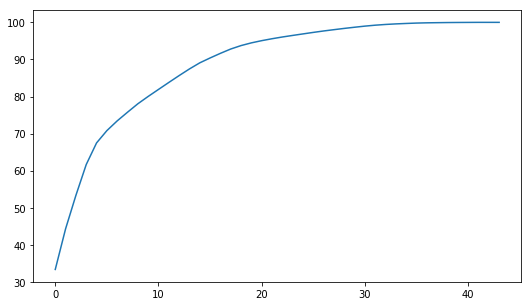

In [64]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20))
plt.plot(cumulative_variance)

So, we can clearly see that over `91%` variance is being captured with 16 variables.

In [67]:
# create pipeline
PCA_VAR = 16
steps = [("pca", PCA(n_components=PCA_VAR)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [68]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8128056605736881

`0.81` doesn't seems like a good enough training score, let's check the model's performance on the test data,

In [71]:
# removing the columns from the X_test
X_test = X_test.drop(['job_housemaid', 'job_unemployed', 'month_oct', 'default_yes', 'month_jul', 'pdays_Contacted_in_first_10days'], 1)

In [72]:
# predict response on the test data
y_pred = pipeline.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity:  ", round(sensitivity, 2), "\n", "Specificity:  ", round(specificity, 2), sep='')

# checking the area under curve(AUC)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:     ", round(roc_auc_score(y_test, y_pred_prob),2))

[[9127 1848]
 [ 535  847]]
Sensitivity:  0.61
Specificity:  0.83
AUC:      0.77


In [73]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.886997
1    0.113003
Name: response, dtype: float64

Definitely not a good model to consider at all, let's perform the k-fold cross validation.

In [74]:
# PCA
pca = PCA()

# logistic regression - using class weight to handle the class imbalance
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [16,17,18,19,20,21], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [75]:
# fit the model
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [16, 17, 18, 19, 20, 21], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [76]:
# print best hyperparameters
print("Best AUC is  ", model.best_score_)
print("Best hyperparameters are  ", model.best_params_)

Best AUC is   0.7823528893135893
Best hyperparameters are   {'logistic__C': 1, 'logistic__penalty': 'l2', 'pca__n_components': 17}


In [77]:
# predicting response on test data
y_pred = model.predict(X_test)

# creating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity:  ", round(sensitivity, 2), "\n", "Specificity:  ", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:          ", round(roc_auc_score(y_test, y_pred_prob),2))

[[9082 1893]
 [ 521  861]]
Sensitivity:  0.62
Specificity:  0.83
AUC:           0.77


In [78]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.95      0.83      0.88     10975
          1       0.31      0.62      0.42      1382

avg / total       0.87      0.80      0.83     12357



so we have got the best logistic regression model. Let's 

In [80]:
pred_prob = pd.DataFrame(pd.Series(y_pred_prob), columns = ['pred_prob'])

decile_df = pd.concat([pd.DataFrame(y_test).reset_index(), pred_prob], ignore_index=True,axis=1)
decile_df.drop(0, inplace=True, axis = 1)
decile_df.rename({1:'actual', 2:'pred_prob'}, axis=1, inplace=True)

In [84]:
decile_df

,actual,pred_prob
0,0,0.517827
1,0,0.337173
2,0,0.256171
3,1,0.935093
4,0,0.210979
5,1,0.484554
6,0,0.353482
7,0,0.193355
8,0,0.323957
9,0,0.329497


In [92]:
# adding the two columns(prospectid, duration) to the decile_df
test_df = pd.concat([pd.DataFrame(X_test_dur).reset_index(), decile_df], ignore_index=True, axis=1)

In [93]:
test_df

,0,1,2,3,4
0,33148,33148,52,0,0.517827
1,27585,27585,407,0,0.337173
2,15722,15722,177,0,0.256171
3,40349,40349,187,1,0.935093
4,2576,2576,165,0,0.210979
5,33359,33359,725,1,0.484554
6,26890,26890,75,0,0.353482
7,8032,8032,29,0,0.193355
8,13180,13180,272,0,0.323957
9,10102,10102,139,0,0.329497


In [101]:
test_df.drop(0, inplace=True, axis=1)
test_df.rename({1:'prospectid', 2:'duration', 3:'actual', 4:'pred_prob'}, axis=1, inplace=True)

In [102]:
test_df

,prospectid,duration,actual,pred_prob
0,33148,52,0,0.517827
1,27585,407,0,0.337173
2,15722,177,0,0.256171
3,40349,187,1,0.935093
4,2576,165,0,0.210979
5,33359,725,1,0.484554
6,26890,75,0,0.353482
7,8032,29,0,0.193355
8,13180,272,0,0.323957
9,10102,139,0,0.329497


In [124]:
# preparing the dataframe for the training data
y_pred_prob_train = model.predict_proba(X_train)[:, 1]

pred_prob_train = pd.DataFrame(pd.Series(y_pred_prob_train), columns = ['pred_prob'])
decile_df_train = pd.concat([pd.DataFrame(y_train).reset_index(), pred_prob_train], ignore_index=True,axis=1)
decile_df_train.drop(0, inplace=True, axis = 1)

In [125]:
decile_df_train.head()

,1,2
0,0,0.205185
1,0,0.302378
2,0,0.301094
3,0,0.892283
4,0,0.318946


In [128]:
# adding the two columns(prospectid, duration) to the decile_df_train
train_df = pd.concat([pd.DataFrame(X_train_dur).reset_index(), decile_df_train], ignore_index=True, axis=1)
train_df.head()

,0,1,2,3,4
0,7019,7019,102,0,0.205185
1,27175,27175,218,0,0.302378
2,15817,15817,333,0,0.301094
3,40971,40971,130,0,0.892283
4,8467,8467,267,0,0.318946


In [129]:
train_df.drop(0, inplace=True, axis=1)
train_df.rename({1:'prospectid', 2:'duration', 3:'actual', 4:'pred_prob'}, axis=1, inplace=True)

In [130]:
train_df.head()

,prospectid,duration,actual,pred_prob
0,7019,102,0,0.205185
1,27175,218,0,0.302378
2,15817,333,0,0.301094
3,40971,130,0,0.892283
4,8467,267,0,0.318946


In [132]:
# merging the test and train dataframes
final_df = pd.concat([train_df, test_df], ignore_index=True)
final_df.head()

,prospectid,duration,actual,pred_prob
0,7019,102,0,0.205185
1,27175,218,0,0.302378
2,15817,333,0,0.301094
3,40971,130,0,0.892283
4,8467,267,0,0.318946


Let's now arrange the final dataframe in the descending order of the predicted probability to find-out the cut-off.

In [140]:
final_df.sort_values(by='pred_prob', ascending=False).head(4000)

,prospectid,duration,actual,pred_prob
32520,40652,638,1,0.950257
39850,40575,532,1,0.949481
29675,40854,678,1,0.949465
18756,40661,708,1,0.949050
34513,40559,300,1,0.948205
16238,40368,180,1,0.947936
25282,40679,209,1,0.947921
27371,39911,706,1,0.947585
9970,40734,316,1,0.947509
28402,39830,206,1,0.947507


As we can see that predicted probability of 0.8 is hitting right, while 0.7 has a mix with equally prevalent false positives, let's therefore take `0.6 as the cutoff`

In [141]:
final_df_copy = final_df

In [142]:
final_df['predicted'] = final_df.pred_prob.map(lambda x: 1 if x > 0.6 else 0)

In [143]:
final_df

,prospectid,duration,actual,pred_prob,predicted
0,7019,102,0,0.205185,0
1,27175,218,0,0.302378,0
2,15817,333,0,0.301094,0
3,40971,130,0,0.892283,1
4,8467,267,0,0.318946,0
5,21860,104,0,0.314144,0
6,11416,87,0,0.340527,0
7,27833,1271,1,0.651116,1
8,26816,627,0,0.339135,0
9,28102,383,0,0.653536,1


In [144]:
# rearranging the dataframe columns as indicated
cols = ['prospectid', 'actual', 'predicted', 'pred_prob', 'duration']

final_df = final_df[cols]

In [146]:
final_df

,prospectid,actual,predicted,pred_prob,duration
0,7019,0,0,0.205185,102
1,27175,0,0,0.302378,218
2,15817,0,0,0.301094,333
3,40971,0,1,0.892283,130
4,8467,0,0,0.318946,267
5,21860,0,0,0.314144,104
6,11416,0,0,0.340527,87
7,27833,1,1,0.651116,1271
8,26816,0,0,0.339135,627
9,28102,0,1,0.653536,383


In [150]:
# Now assuming that the Cost of Call is 1 Euro per minute, adding the Cost column to the dataframe
final_df['cost'] = np.ceil(final_df['duration']/60)

final_df

,prospectid,actual,predicted,pred_prob,duration,cost
0,7019,0,0,0.205185,102,2.0
1,27175,0,0,0.302378,218,4.0
2,15817,0,0,0.301094,333,6.0
3,40971,0,1,0.892283,130,3.0
4,8467,0,0,0.318946,267,5.0
5,21860,0,0,0.314144,104,2.0
6,11416,0,0,0.340527,87,2.0
7,27833,1,1,0.651116,1271,22.0
8,26816,0,0,0.339135,627,11.0
9,28102,0,1,0.653536,383,7.0


In [151]:
# creating the lift dataframe for further analysis
final_df['decile'] = pd.qcut(final_df['pred_prob'], 10, labels=np.arange(10, 0, -1))

In [152]:
lift_df = final_df.groupby('decile')['pred_prob'].count().reset_index()
lift_df.rename({'pred_prob':'total'}, axis=1, inplace=True)
lift_df.head()

,decile,total
0,10,4119
1,9,4119
2,8,4119
3,7,4118
4,6,4119


In [153]:
pred_lift_df = final_df[final_df['actual']==1].groupby('decile')['actual'].count().reset_index()
pred_lift_df.head()

,decile,actual
0,10,129
1,9,129
2,8,211
3,7,218
4,6,239


In [154]:
lift_df_final = lift_df.merge(pred_lift_df,on = 'decile')
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)
lift_df_final.head()

,decile,total,actual
9,1,4119,1930
8,2,4119,923
7,3,4119,388
6,4,4118,253
5,5,4119,220


In [155]:
# finding cumulative response
lift_df_final['cumresp'] = lift_df_final['actual'].cumsum()

# finding the gain
lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['actual']))

# finding the cumulative lift
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

lift_df_final

,decile,total,actual,cumresp,gain,cumlift
9,1,4119,1930,1930,41.594828,4.159483
8,2,4119,923,2853,61.487069,3.074353
7,3,4119,388,3241,69.849138,2.328305
6,4,4118,253,3494,75.301724,1.882543
5,5,4119,220,3714,80.043103,1.600862
4,6,4119,239,3953,85.193966,1.419899
3,7,4118,218,4171,89.892241,1.284175
2,8,4119,211,4382,94.439655,1.180496
1,9,4119,129,4511,97.219828,1.080220
0,10,4119,129,4640,100.000000,1.000000


Therefore, we will need to target `50% of the client base` to get 80% conversion. Now to find out the average call duration for targeting the top 50% prospects.

In [162]:
final_df.loc[final_df['decile']<6, ['duration']].mean(axis=0)

duration    247.449044
dtype: float64

So, clearly it would take `4 minutes per prospect on an average` for targeting the top 50% client base.

In [165]:
# adding a new column to the lift dataframe for the cumulative total
lift_df_final['cum_total'] = lift_df_final['total'].cumsum()

lift_df_final

,decile,total,actual,cumresp,gain,cumlift,cum_total
9,1,4119,1930,1930,41.594828,4.159483,4119
8,2,4119,923,2853,61.487069,3.074353,8238
7,3,4119,388,3241,69.849138,2.328305,12357
6,4,4118,253,3494,75.301724,1.882543,16475
5,5,4119,220,3714,80.043103,1.600862,20594
4,6,4119,239,3953,85.193966,1.419899,24713
3,7,4118,218,4171,89.892241,1.284175,28831
2,8,4119,211,4382,94.439655,1.180496,32950
1,9,4119,129,4511,97.219828,1.080220,37069
0,10,4119,129,4640,100.000000,1.000000,41188


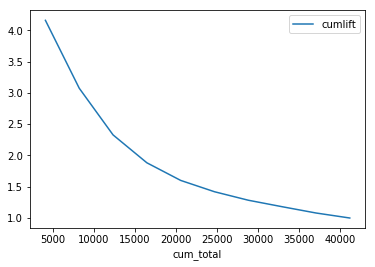

In [166]:
lift_df_final.plot.line(x='cum_total', y=['cumlift'])

Finally, the cost of acquisition of the 80% of the customers would be, 

Cost = 1 * number of contacts made in the current campaign

i.e, 

Cost = 1 * 20594         
`Cost = 20,549 Euro`

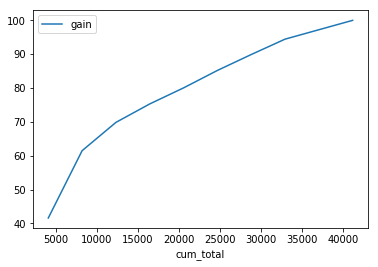

In [167]:
lift_df_final.plot.line(x='cum_total', y=['gain'])